In [1]:
%pylab inline

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Classification Report

- **class 0**: 
- **class 1**: precision = 1 
   - TP가 있으며, FP는 없다 > 1이라고 예측해서 틀린게 없다. (1인데 틀린건 있음)
- **class 2**: recall = 1
   - TP가 있으며, 

In [2]:
from sklearn.metrics import classification_report

y_true = [0, 0, 1, 1, 1, 1, 1, 2, 2, 3]
y_pred = [0, 2, 1, 1, 2, 0, 0, 2, 2, 0]

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       1.00      0.40      0.57         5
           2       0.50      1.00      0.67         2
           3       0.00      0.00      0.00         1

    accuracy                           0.50        10
   macro avg       0.44      0.47      0.39        10
weighted avg       0.65      0.50      0.49        10



C:\Users\anderson\anaconda3\envs\zeta\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anderson\anaconda3\envs\zeta\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anderson\anaconda3\envs\zeta\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion Matrix

 - Row: True Label 
 - Column: Predicted Label

[[1 0 1 0]
 [2 2 1 0]
 [0 0 2 0]
 [1 0 0 0]]


Text(0.5, 15.0, 'Predict')

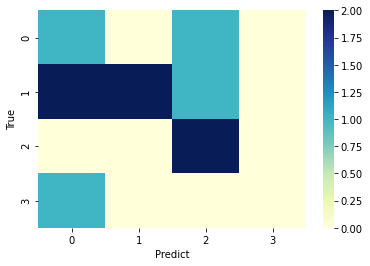

In [160]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = [0, 0, 1, 1, 1, 1, 1, 2, 2, 3]
y_pred = [0, 2, 1, 1, 2, 0, 0, 2, 2, 0]

cm = confusion_matrix(y_true, y_pred)

print(cm)
ax = sns.heatmap(cm, cmap='YlGnBu')
ax.set_ylabel('True')
ax.set_xlabel('Predict')

# Accuracy

$$ \text{Accuracy} = \frac{TP + TN}{N} $$

## Accuracy 

In [72]:
from sklearn.metrics import accuracy_score

y_true = [0, 0, 1, 1, 1, 1, 1, 2, 2, 3]
y_pred = [0, 2, 1, 1, 2, 0, 0, 2, 2, 0]

acc = accuracy_score(y_true, y_pred)
acc_norm = accuracy_score(y_true, y_pred, normalize=False)

print('n:', len(y_true))
print(f'Accuracy           : {acc:.2}')
print(f'Normalized Accuracy: {acc_norm}')

n: 10
Accuracy           : 0.5
Normalized Accuracy: 5


## Accuracy from Confusion Matrix

In [184]:
def cal_accuracy(cm):
    """
    대각선으로 (TP + TN) 모두 합하고, 전체 N 값으로 나눈다
    """
    return np.diagonal(cm).sum() / cm.sum()

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3]
y_pred = [1, 0, 0, 1, 2, 1, 2, 2, 3, 0, 0, 0, 0, 1, 0, 3, 1]
cm = confusion_matrix(y_true, y_pred)
print(cm)

assert accuracy_score(y_true, y_pred) == cal_accuracy(cm)
print('Accuracy:', cal_accuracy(cm))

[[2 2 1 0]
 [1 1 2 1]
 [4 1 0 0]
 [0 1 0 1]]
Accuracy: 0.23529411764705882


# Recall (Sensitivity, True Positive Rate)

$$ \text{True Positive Rate} = \frac{TP}{TP + FN} $$

 - 단점: 전부다 1로 예측하면, TP는 다 맞추고, FN은 0이 되면서, recall의 예측값은 1이 된다



**average parameter**
  - **None**  : 각각의 클래스마다의 recall값을 계산한다
  - **binary**: (default) binary classification에서 사용 
  - **micro** : 전체 클래스 데이터 관점에서의 total true positives, false negatives, false positives 를 계산
  - **macro** : 각각의 label마다의 recall의 unweighted mean을 계산한다. 따라서 label imbalance를 고려하지 않는다

## Recall 

In [178]:
from sklearn.metrics import recall_score

y_true = [0, 0, 1, 1, 1, 1, 1, 2, 2, 3]
y_pred = [0, 2, 1, 1, 2, 0, 0, 2, 2, 0]


recalls = recall_score(y_true, y_pred, average=None)
recall_micro = recall_score(y_true, y_pred, average='micro')
recall_macro = recall_score(y_true, y_pred, average='macro')
recall_weighted = recall_score(y_true, y_pred, average='weighted')

print('Recalls          :', recalls)
print(f'Recall (micro)   : {recall_micro:.2}')
print(f'Recall (macro)   : {recall_macro:.2}')
print(f'Recall (weighted): {recall_weighted:.2}')

Recalls          : [0.5 0.4 1.  0. ]
Recall (micro)   : 0.5
Recall (macro)   : 0.47
Recall (weighted): 0.5


## Recall from Confusion Matrix

In [209]:
def cal_recall(cm, average=None):
    data = [np.nan_to_num(cm[i, i] / cm[i, :].sum()) for i in range(cm.shape[0])]
    data = np.array(data)
    
    if average is None:
        return data
    elif average == 'macro':
        return data.mean()
    elif average == 'micro':
        weight = cm.sum(axis=1)
        return (data * weight).sum() / weight.sum()
    return data

# y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3]
# y_pred = [1, 0, 0, 1, 2, 1, 2, 2, 3, 0, 0, 0, 0, 1, 0, 3, 1]

cm = confusion_matrix(y_true, y_pred)
print(cm)
answer = recall_score(y_true, y_pred, average=None)
assert (answer == cal_recall(cm, average=None)).all()

answer = recall_score(y_true, y_pred, average='macro')
assert answer == cal_recall(cm, average='macro')

answer = recall_score(y_true, y_pred, average='micro')
assert answer == cal_recall(cm, average='micro')


print('recalls        :', cal_recall(cm, average=None))
print('recalls (macro):', cal_recall(cm, average='macro'))
print('recalls (micro):', cal_recall(cm, average='micro'))

[[1 0 1 0]
 [2 2 1 0]
 [0 0 2 0]
 [1 0 0 0]]
recalls        : [0.5 0.4 1.  0. ]
recalls (macro): 0.475
recalls (micro): 0.5


# Precision

$$ \text{Precision} = \frac{TP}{TP + FP} = \frac{TP}{\text{Predicted Yes}} $$

In [195]:
from sklearn.metrics import precision_score

y_true = [0, 0, 1, 1, 1, 1, 1, 2, 2, 3]
y_pred = [0, 2, 1, 1, 2, 0, 0, 2, 2, 0]

precisions = precision_score(y_true, y_pred, average=None, zero_division=False)
precision_micro = precision_score(y_true, y_pred, average='micro', zero_division=False)
precision_macro = precision_score(y_true, y_pred, average='macro', zero_division=False)
precision_weighted = precision_score(y_true, y_pred, average='weighted', zero_division=False)

print('Precisions       :', precisions)
print(f'Precision (micro)   : {precision_micro:.2}')
print(f'Precision (macro)   : {precision_macro:.2}')
print(f'Precision (weighted): {precision_weighted:.2}')

Precisions       : [0.25 1.   0.5  0.  ]
Precision (micro)   : 0.5
Precision (macro)   : 0.44
Precision (weighted): 0.65


## Precision from Confusion Matrix

In [235]:
def cal_precision(cm, average=None):
    data = [np.nan_to_num(cm[i, i] / cm[:, i].sum()) for i in range(cm.shape[0])]
    data = np.array(data)

    if average is None:
        return data
    elif average == 'macro':
        return data.mean()
    elif average == 'micro':
        weight = cm.sum(axis=0)
        return (data * weight).sum() / weight.sum()
    return data

cm = confusion_matrix(y_true, y_pred)

answer = precision_score(y_true, y_pred, average=None, zero_division=False)
assert (answer == cal_precision(cm)).all()

answer = precision_score(y_true, y_pred, average='macro', zero_division=False)
assert answer == cal_precision(cm, average='macro')

answer = precision_score(y_true, y_pred, average='micro', zero_division=False)
assert answer == cal_precision(cm, average='micro')


print(f'Precisions        : {cal_precision(cm)}')
print(f'Precision (macro) : {cal_precision(cm, average="macro"):.2}')
print(f'Precision (micro) : {cal_precision(cm, average="micro"):.2}')

Precisions        : [0.25 1.   0.5  0.  ]
Precision (macro) : 0.44
Precision (micro) : 0.5


<ipython-input-235-10a483400abf>:2: RuntimeWarning: invalid value encountered in longlong_scalars
  data = [np.nan_to_num(cm[i, i] / cm[:, i].sum()) for i in range(cm.shape[0])]
<ipython-input-235-10a483400abf>:2: RuntimeWarning: invalid value encountered in longlong_scalars
  data = [np.nan_to_num(cm[i, i] / cm[:, i].sum()) for i in range(cm.shape[0])]
<ipython-input-235-10a483400abf>:2: RuntimeWarning: invalid value encountered in longlong_scalars
  data = [np.nan_to_num(cm[i, i] / cm[:, i].sum()) for i in range(cm.shape[0])]


# F1 Score

$$ \text{F1 Score} = 2 \cdot
\frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}} $$

In [9]:
from sklearn.metrics import f1_score

y_true = [0, 0, 1, 1, 1, 1, 1, 2, 2, 3]
y_pred = [0, 2, 1, 1, 2, 0, 0, 2, 2, 0]

f1_score(y_true, y_pred, average=None)

f1 = f1_score(y_true, y_pred, average=None)
f1_micro = f1_score(y_true, y_pred, average='micro')
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print('F1       :', f1)
print(f'F1 (micro)   : {f1_micro:.2}')
print(f'F1 (macro)   : {f1_macro:.2}')
print(f'F1 (weighted): {f1_weighted:.2}')

F1       : [0.33333333 0.57142857 0.66666667 0.        ]
F1 (micro)   : 0.5
F1 (macro)   : 0.39
F1 (weighted): 0.49
